# DS-SF-32 | Homework 02: The `pandas` Library

In this homework, we will be exploring the `police shootings` dataset using `pandas`.

In [4]:
import pandas as pd

In [63]:
killings = pd.read_csv('../../dataset/police-killings.csv')
killings.shape

(467, 15)

#### A) Starter question: Display a few lines of the dataset to the screen.

In [64]:
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669



#### 1. Make the following changed to column names:

+ lawenforcementagency -> agency
+ raceethnicity        -> race


In [65]:
killings['agency'] = killings.lawenforcementagency
killings['race'] = killings.raceethnicity
killings.drop(['lawenforcementagency', 'raceethnicity'], inplace=True, axis=1)
killings.head()

,Unnamed: 0,name,age,gender,month,day,year,streetaddress,city,state,cause,armed,county_income,agency,race
0,0,A'donte Washington,16,Male,February,23,2015,Clearview Ln,Millbrook,AL,Gunshot,No,54766,Millbrook Police Department,Black
1,1,Aaron Rutledge,27,Male,April,2,2015,300 block Iris Park Dr,Pineville,LA,Gunshot,No,40930,Rapides Parish Sheriff's Office,White
2,2,Aaron Siler,26,Male,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Gunshot,No,54930,Kenosha Police Department,White
3,3,Aaron Valdez,25,Male,March,11,2015,3000 Seminole Ave,South Gate,CA,Gunshot,Firearm,55909,South Gate Police Department,Hispanic/Latino
4,4,Adam Jovicic,29,Male,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Gunshot,No,49669,Kent Police Department,White



#### 2. Show the count of missing values in each column


In [14]:
killings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 13 columns):
Unnamed: 0       467 non-null int64
name             467 non-null object
age              467 non-null int64
gender           467 non-null object
month            467 non-null object
day              467 non-null int64
year             467 non-null int64
streetaddress    463 non-null object
city             467 non-null object
state            467 non-null object
cause            467 non-null object
armed            467 non-null object
county_income    467 non-null int64
dtypes: int64(5), object(8)
memory usage: 47.5+ KB


#### 3. replace each null value in the dataframe with the string "Unknown"

In [66]:
killings.fillna('Unknown', inplace=True)
killings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 15 columns):
Unnamed: 0       467 non-null int64
name             467 non-null object
age              467 non-null int64
gender           467 non-null object
month            467 non-null object
day              467 non-null int64
year             467 non-null int64
streetaddress    467 non-null object
city             467 non-null object
state            467 non-null object
cause            467 non-null object
armed            467 non-null object
county_income    467 non-null int64
agency           467 non-null object
race             467 non-null object
dtypes: int64(5), object(10)
memory usage: 54.8+ KB


#### 4. How many killings were there so far in 2015?

In [67]:
len(killings.loc[killings.year == 2015])

467

#### 5. Of all killings, how many were male and how many female?

In [68]:
killings.gender.value_counts()

Male      445
Female     22
Name: gender, dtype: int64

#### 6. How many killings were of unarmed people?


In [69]:
len(killings[killings.armed=='No'])

102

#### 7. What percentage of all killings were unarmed?


In [70]:
102.0/len(killings)

0.21841541755888652

#### 8. What are the 5 states with the most killings?


In [71]:
killings.groupby('state').count().sort_values('name', ascending=False)
print 'CA and TX'

CA and TX


#### 9. Show a value counts of deaths for each race


In [72]:
killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

#### 10. Display a histogram of ages of all killings


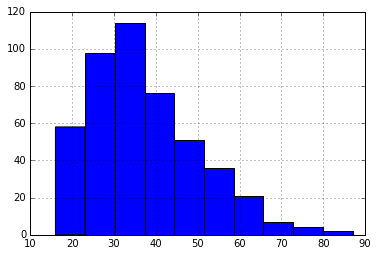

In [73]:
%matplotlib inline
killings.age.hist()

#### 11. Show 6 histograms of ages by race


#### 12. What is the average age of death by race?


In [74]:
killings.groupby('race').age.mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

#### 13. Show a bar chart with counts of deaths every month


In [79]:
data = killings.month.value_counts()

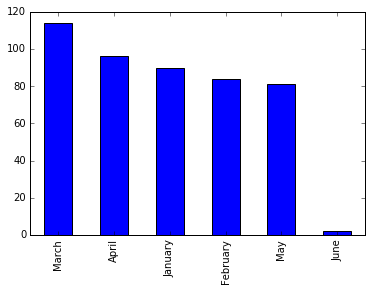

In [82]:
data.plot(kind='bar')